<div style="text-align: right"> Mark Hendricks </div>

<left>FINM 36700 - Portfolio Theory and Risk Management</left> 
<br>
<left>Fall 2022</left>

<h2><center> Homework 2 - ProShares Hedge Replication ETF </center></h2>

<center>Due on Monday, Oct 10</center>

<h3><span style="color:#00008B">Solution - Piyush Kontu</span></h3>

<h3><span style="color:#00008B">Email - pkontu@uchicago.edu</span></h3>

### ProShares Hedge Replication ETF [UV6939].

### <i>The case is only seven pages, though it contains many exhibits. No need to study/review the exhibits beyond what is useful in addressing the homework questions. But they are interesting if you are inclined. </i>

# 1.   The ProShares ETF Product
- <b> This section is not graded, and you do not need to submit your answers. </b>
- But you are expected to consider these issues and be ready to discuss them.
- This section requires no empirical analysis; answer solely based on the material given in the case.

## 1.) Alternative ETFs" 

### Describe the two types of investments referenced by this term.

See Figure 1 of the case.

i) Investing in alternative instruments like Swaps, Credits, Real estate, commodities, precious metals, currencies, volatility, private equity. 

ii) Using Alternative investment strategies like replication using factors

## 2.) Hedge Funds.

### (a) Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

- Hedge Funds had better returns than the market and lower Volaitility (smoother returns) making them an attractive instrument ( the HFRI has a much higher SR than the S&P500 - .84 vs .41) . Hedge Funds provide diversification benefits. <br><br>

- Lower volatility ususally is because of lack of pricing of these illiquid or niche assets in the Hedge Fund

### (b) What are the main benefits of investing in hedge funds via an ETF instead of directly?

- ETFs are liquid and are accesible to lower net worth individuals. Hedge funds have higher fee 2%-20%, where as ETFs have lower expense ratio as their fee. <br><br>
- Furthermore, the investment does not have the idiosyncratic risk of a single fund, subject to that single fund's management, legal risks, etc. <br><br>

- Of course, there are drawbacks to investing in the ETF instead of a single fund. Namely, the single fund may deliver excess returns (alpha) via specialized information, market access, skill, etc.



## 3.) The Benchmarks

### (a) Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.


- **HFRI** - Hedge fund Index Series. Index of surveyed hedge funds (2000 Holdings) designed to track the performance of the hedge market as a whole. Monthly returns based on surveys. This can't be launched as an ETF as they need a third party index as benchmark. <br><br>

- **MLFM** - Index Series created by Merrill Lynch, to replicate the performance of HFRI. Its a linear factor decomposition of the HFRI returns into 6 assets. This is not an asset and not an ETF. <br><br>

- **MLFM-ES** - MLFM exchange serires, similar to MLFM, but a benchmark to HDG and thus it contains liquid investable assets. It also makes one change in the factors, substituting  6- month Eurodollar deposit yields with US Treasury Bills. <br><br>

- **HDG** - Actual tradaeble asset trying to track the MLFM-ES, by actually trading on these assets. HDG do not strictly adhere to MLFM-ES replication and would deviate from positions if they can get additional returns or reduce transaction cost. <br><br>


### (b) How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

- Exhibit 1, slide 18 shows that MLFM to HFRI has a correlation of 0.90 through 2013.

### (c) In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

-  By far, the largest factor loading is in t-bills. This is true throughout 2013 and 2014. See Exhibit 1, slides 19-20 for details.

### (d) What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

- The factors used in the MLFM are highly correlated, which raises concerns about the factor weights. Also, the dynamic regression used to construct the weights on the six factors was a backward-looking exercise, thus it will always lag behind the changes in hedge fund style.


## 4.) The HDG Product

### (a) What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

- HDG tracks MLFM-ES Index benchmark. The tracking error is low.<br><br>

-  HDG tracks a modified version of the ML Factor Model, MLFM-ES. The Merrill Lynch Factor Model involves indexes which cannot be exactly traded. For that reason, ProShares created a traded version of the Factor Model which replaces non-traded indexes with liquid, traded securities. <br><br>

- Exhibit 1, slide 22 shows that this modified benchmark tracks the standard ML Factor Model with a correlation of 99.7% when looking at daily data from 2011-2013. <br><br>

- Exhibit 2 shows that HDG tracks this benchmark closely, though it does not report a numerical estimate.

### (b) HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

- HDG may be valuable by delivering complicated or expensive beta to investors. In that sense, a sophisticated "beta" could be valued as "alpha" by investors, especially if delivered in a low-cost ETF. <br><br>

- And even if HDG is delivering only accessible beta, it could be valuable to a portfolio through its ability to diversify against traditional equity and bond allocations, as shown in Exhibit 1 and discussed as a benefit of HFRI. And at ETF fees, this could be an efficient way of loading into these alternative exposures.

### (c) The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?


- The gross returns of the underlying assets have a Sharpe Ratio of 0.50. Net of the 1% fee, the net SR for the ETF would then be 9/20 = 0.45. Net of fees, the hedge-fund has 6% excess returns, which leads to a Sharpe Ratio of 6/20 = 0.30. <br><br>

- Of course, this calculation is very simple, but it intends to illustrate that performance is sensitive to the high fees traditionally charged by hedge funds. In the numerical example above, the ETF delivers 90% of the asset-level Sharpe Ratio, while the Hedge Fund delivers 60% of the underlying asset Sharpe Ratio. Thus, though the ETF may miss some of the individual hedge-fund premia, it also has a lower hurdle rate given the lower fees.

# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

import matplotlib.pyplot as plt

# Helper Functions

In [2]:
def performance_summary(return_data, annualization = 12):
    """ 
        Returns the Performance Stats for given set of returns
        Inputs: 
            return_data - DataFrame with Date index and Monthly Returns for different assets/strategies.
        Output:
            summary_stats - DataFrame with annualized mean return, vol, sharpe ratio. Skewness, Excess Kurtosis, Var (0.5) and
                            CVaR (0.5) and drawdown based on monthly returns. 
    """
    summary_stats = return_data.mean().to_frame('Mean').apply(lambda x: x*annualization)
    summary_stats['Volatility'] = return_data.std().apply(lambda x: x*np.sqrt(annualization))
    summary_stats['Sharpe Ratio'] = summary_stats['Mean']/summary_stats['Volatility']

    summary_stats['Skewness'] = return_data.skew()
    summary_stats['Excess Kurtosis'] = return_data.kurtosis()
    summary_stats['VaR (0.05)'] = return_data.quantile(.05, axis = 0)
    summary_stats['CVaR (0.05)'] = return_data[return_data <= return_data.quantile(.05, axis = 0)].mean()
    
    wealth_index = 1000*(1+return_data).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks

    summary_stats['Max Drawdown'] = drawdowns.min()
    summary_stats['Peak'] = [previous_peaks[col][:drawdowns[col].idxmin()].idxmax() for col in previous_peaks.columns]
    summary_stats['Bottom'] = drawdowns.idxmin()
    
    recovery_date = []
    for col in wealth_index.columns:
        prev_max = previous_peaks[col][:drawdowns[col].idxmin()].max()
        recovery_wealth = pd.DataFrame([wealth_index[col][drawdowns[col].idxmin():]]).T
        recovery_date.append(recovery_wealth[recovery_wealth[col] >= prev_max].index.min())
    summary_stats['Recovery'] = recovery_date
    
    return summary_stats

In [3]:
def regression_based_performance(factor,fund_ret,rf,constant = True):
    """ 
        Returns the Regression based performance Stats for given set of returns and factors
        Inputs:
            factor - Dataframe containing monthly returns of the regressors
            fund_ret - Dataframe containing monthly excess returns of the regressand fund
            rf - Monthly risk free rate of return
        Output:
            summary_stats - (Beta of regression, treynor ratio, information ratio, alpha). 
    """
    if constant:
        X = sm.tools.add_constant(factor)
    else:
        X = factor
    y=fund_ret
    model = sm.OLS(y,X,missing='drop').fit()
    
    if constant:
        beta = model.params[1:]
        alpha = round(float(model.params['const']),6)
        
    else:
        beta = model.params
    treynor_ratio = ((fund_ret.values-rf.values).mean()*12)/beta[0]
    tracking_error = (model.resid.std()*np.sqrt(12))
    if constant:        
        information_ratio = model.params[0]*12/tracking_error
    r_squared = model.rsquared
    if constant:
        return (beta,treynor_ratio,information_ratio,alpha,r_squared,tracking_error)
    else:
        return (beta,treynor_ratio,r_squared,tracking_error)

In [4]:
def rolling_regression_param(factor,fund_ret,roll_window = 60):
    """ 
        Returns the Rolling Regression parameters for given set of returns and factors
        Inputs:
            factor - Dataframe containing monthly returns of the regressors
            fund_ret - Dataframe containing monthly excess returns of the regressand fund
            roll_window = rolling window for regression
        Output:
            params - Dataframe with time-t as the index and constant and Betas as columns
    """
    X = sm.add_constant(factor)
    y= fund_ret
    rols = RollingOLS(y, X, window=roll_window)
    rres = rols.fit()
    params = rres.params.copy()
    params.index = np.arange(1, params.shape[0] + 1)
    return params
    

# Reading Data

In [5]:
hf_data = pd.read_excel(r'C:\Users\piyus\Documents\Repos\finm-portfolio-2022\data\proshares_analysis_data.xlsx',sheet_name = 'hedge_fund_series', index_col = 0)
hf_data.index.name = 'date'
hf_data.head()

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
date,,,,,
2011-08-31,-0.032149,-0.025588,-0.025689,-0.027035,-0.006489
2011-09-30,-0.038903,-0.032414,-0.032593,-0.032465,-0.022144
2011-10-31,0.026858,0.043593,0.043320,0.050530,0.025241
2011-11-30,-0.013453,-0.012142,-0.012431,-0.028606,-0.007965
2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001823


In [6]:
merrill = pd.read_excel(r'C:\Users\piyus\Documents\Repos\finm-portfolio-2022\data\proshares_analysis_data.xlsx',sheet_name = 'merrill_factors', index_col = 0)
merrill.index.name = 'date'
merrill.head()

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
date,,,,,,
2011-08-31,-0.054976,0.000009,-0.092549,-0.087549,-0.005889,-0.088915
2011-09-30,-0.069421,0.000017,-0.179066,-0.108084,0.142180,-0.111504
2011-10-31,0.109148,-0.000013,0.162989,0.096276,-0.069502,0.151010
2011-11-30,-0.004064,0.000000,-0.019724,-0.021763,0.054627,-0.003782
2011-12-31,0.010449,0.000009,-0.042648,-0.021746,0.075581,0.005144


In [7]:
other_data = pd.read_excel(r'C:\Users\piyus\Documents\Repos\finm-portfolio-2022\data\proshares_analysis_data.xlsx',sheet_name = 'other_data', index_col = 0)
other_data.index.name = 'date'
other_data.head()

,TRVCI Index,HEFA US Equity,TAIL US Equity,SPXU US Equity,UPRO US Equity
date,,,,,
2011-08-31,-0.065162,NaN,NaN,0.056476,-0.210872
2011-09-30,-0.036807,NaN,NaN,0.190006,-0.206957
2011-10-31,0.099964,NaN,NaN,-0.298828,0.326032
2011-11-30,-0.035844,NaN,NaN,-0.035515,-0.033520
2011-12-31,-0.025485,NaN,NaN,-0.051986,0.022941


# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. It has monthly data on financial indexes and ETFs from Aug 2011 through Sep 2021.

### 1) For the series in the "hedge fund series" tab, report the following summary statistics:
### (a) mean
### (b) volatility
### (c) Sharpe ratio
### Annualize these statistics.


Since HFRI is just an index, as we try to replicate it with tradeable assets, the sharpe ratio is going down.

In [8]:
summary_stats = performance_summary(hf_data)
summary_stats.loc[:,['Mean','Volatility','Sharpe Ratio']]

,Mean,Volatility,Sharpe Ratio
HFRIFWI Index,0.042867,0.060912,0.703758
MLEIFCTR Index,0.025665,0.056867,0.451308
MLEIFCTX Index,0.024278,0.056685,0.428294
HDG US Equity,0.014007,0.059239,0.236455
QAI US Equity,0.011576,0.048915,0.236649


### 2) For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
#### (a) Skewness
#### (b) Excess Kurtosis (in excess of 3)
#### (c) VaR (.05) - the fifth quantile of historic returns
#### (d) CVaR (.05) - the mean of the returns at or below the fifth quantile
#### (e) Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.
#### There is no need to annualize any of these statistics.

HFRI has a higher kurtosis since its from surveyed data points, thus has more outliers. HDG has higher VaR & CVaR compared to its competetor QAI. However, QAI has a lower volatility, thus there is less probability of lower returns and a lower VaR.

In [9]:
summary_stats

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recovery
HFRIFWI Index,0.042867,0.060912,0.703758,-1.020683,6.163102,-0.025585,-0.039205,-0.115473,2019-12-31,2020-03-31,2020-08-31
MLEIFCTR Index,0.025665,0.056867,0.451308,-0.315513,1.778696,-0.029652,-0.036865,-0.124302,2021-06-30,2022-09-30,NaT
MLEIFCTX Index,0.024278,0.056685,0.428294,-0.304807,1.741807,-0.029867,-0.036763,-0.124388,2021-06-30,2022-09-30,NaT
HDG US Equity,0.014007,0.059239,0.236455,-0.298573,1.931106,-0.031528,-0.038482,-0.140720,2021-06-30,2022-09-30,NaT
QAI US Equity,0.011576,0.048915,0.236649,-0.634129,1.913339,-0.021245,-0.034401,-0.137714,2021-06-30,2022-09-30,NaT


### 3.) For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
#### (a) Market Beta
#### (b) Treynor Ratio
#### (c) Information ratio
### Annualize these three statistics as appropriate.

In [10]:
hedge_funds = hf_data.columns
factor = merrill['SPY US Equity']
rf = merrill['USGG3M Index']

df_lst= []
for fund in hedge_funds:
    fund_ret = hf_data[fund]
    reg = regression_based_performance(factor,fund_ret,rf)
    beta = reg[0][0]
    treynor_ratio = reg[1]
    information_ratio = reg[2]
    alpha = reg[3]
    r_squared = reg[4]
    df_lst.append(pd.DataFrame([[beta,treynor_ratio,information_ratio,alpha,r_squared]],columns=['Market Beta','Treynor Ratio','Information Ratio','Alpha','R-Squared'],index = [fund]))

reg_performance = pd.concat(df_lst)
reg_performance

,Market Beta,Treynor Ratio,Information Ratio,Alpha,R-Squared
HFRIFWI Index,0.349957,0.104857,0.012954,0.000036,0.699880
MLEIFCTR Index,0.354876,0.054929,-0.731515,-0.001447,0.825711
MLEIFCTX Index,0.353605,0.051204,-0.784565,-0.001550,0.825091
HDG US Equity,0.363099,0.021580,-1.123684,-0.002502,0.796597
QAI US Equity,0.291895,0.018514,-0.983817,-0.001985,0.755027


### 4.) 4. Relative Performance
### Discuss the previous statistics, and what they tell us about...

### 4.a) the differences between SPY and the hedge-fund series?

- SPY has a higher mean, volatility, and Sharpe Ratio than that of all hedge-fund series. Also, the SPY has smaller tail risks in terms of VaR, and CVaR. Besides, all hedge-fund series have a negative information ratio, which indicates that they fail to beat the market. <br><br>

- The difference between SPY and HF series are mostly notable via statistics obtained through the OLS regression of HF series against the SPY, where the $\beta$ values average at 0.35. Market $\beta$ is an indication of how much the indexes move in comparison with the regressor SPY. As their values are much lower than 1, the hedge fund series show much lower volatility compared to the stock market due to their asset diversification and better downside protection.



In [11]:
pd.DataFrame(reg_performance[['Market Beta','Information Ratio']])

,Market Beta,Information Ratio
HFRIFWI Index,0.349957,0.012954
MLEIFCTR Index,0.354876,-0.731515
MLEIFCTX Index,0.353605,-0.784565
HDG US Equity,0.363099,-1.123684
QAI US Equity,0.291895,-0.983817


### 4.b) which performs better between HDG and QAI.

- Although HDG has a slightly higher mean return, it also has a higher volatility, so it has a smaller Sharpe Ratio than QAI. In addition, HDG contains more tail risks as it has higher VaR, CVaR, and Maximum Drawdown. The recovery period of HDG is also longer than that of QAI. <br><br>

- QAI has better Treynor and information ratios as compared to HDG. Thus QAI outperforms HDG on both metrics of risk adjusted returns. It has a lower systematic risk component - Beta and thus has a higher Treynor Ratio. Similarly a higher alpha (less negative) for QAI leads to a better information ratio.<br><br>

- Overall, the QAI US equity exhibits lower $\beta$ and larger Treynor Ratio, which means the index shows lower volatility and better risk adjusted returns.



In [12]:
summary_stats[summary_stats.index.isin(['HDG US Equity','QAI US Equity'])]

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recovery
HDG US Equity,0.014007,0.059239,0.236455,-0.298573,1.931106,-0.031528,-0.038482,-0.140720,2021-06-30,2022-09-30,NaT
QAI US Equity,0.011576,0.048915,0.236649,-0.634129,1.913339,-0.021245,-0.034401,-0.137714,2021-06-30,2022-09-30,NaT


In [13]:
reg_performance[reg_performance.index.isin(['HDG US Equity','QAI US Equity'])]

,Market Beta,Treynor Ratio,Information Ratio,Alpha,R-Squared
HDG US Equity,0.363099,0.021580,-1.123684,-0.002502,0.796597
QAI US Equity,0.291895,0.018514,-0.983817,-0.001985,0.755027


### 4.c) whether HDG and the ML series capture the most notable properties of HFRI.

- While the HGD and ML series display similar $\beta$ profile as HFRI, which means they have similar risk profiles compared to HFRI. However, HGD and ML series underperforms by 19% and 47% in terms of Treynor ratio which represent worse risk adjusted returns. <br><br>

- In addition, they underperform in terms of $\alpha$, which represents returns unrelated to market movements. This could be attributed to the lack of HF managers' willingness to embrace illiquidity and complex risk premiums (quoted from case conclusion, Page 6) In conclusion, HDG and ML series do not capture the most notable properties of HFRI.<br><br>

- Both HDG and the ML series fail to deliver the same high returns compendated with the high risk of HRFI. The HFRI also shows a very high excess kurtosis, but all of the hedge-fund series has a very small excess kurtosis.

### 5.) Report the correlation matrix for these assets.

### 5.a) Show the correlations as a heat map.

In [14]:
asset_corr = hf_data.corr()

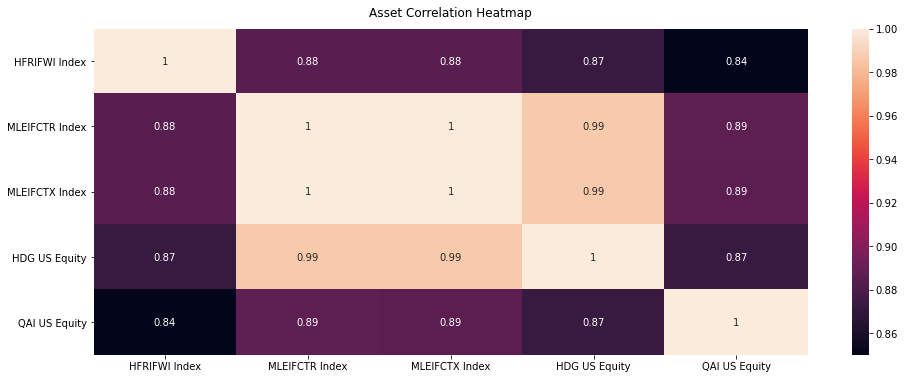

In [15]:
sorted_corr = asset_corr.unstack().sort_values().to_frame('Correlations')
sorted_corr = sorted_corr[sorted_corr['Correlations'] != 1]

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(asset_corr, vmin=0.85, vmax=1, annot=True)
heatmap.set_title('Asset Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### 5.b) Which series have the highest and lowest correlations?

#### Maximum Correlation

In [16]:
sorted_corr.nlargest(3,'Correlations')

,,Correlations
MLEIFCTR Index,MLEIFCTX Index,0.999939
MLEIFCTX Index,MLEIFCTR Index,0.999939
MLEIFCTR Index,HDG US Equity,0.986747


#### Minimum Correlation

In [17]:
sorted_corr.nsmallest(1, 'Correlations')

,,Correlations
QAI US Equity,HFRIFWI Index,0.838482


### 6.) Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,
#### <center> $r^{hfri}_{t} = \alpha^{merr} + x_{t}^{merr}\beta^{merr} + \epsilon_{t}^{merr} $ </center>
#### <center> $\hat{r}^{hfri}_{t} = \hat{\alpha}^{merr} + x_{t}^{merr}\hat{\beta}^{merr}  $ </center>

### Note that the second equation is just our notation for the fitted replication.

### (a) Report the intercept and betas.
### (b) Are the betas realistic position sizes, or do they require huge long-short positions?
### (c) Report the R-squared.
### (d) Report the volatility of $\epsilon^{merr}$, (the tracking error.)

In [18]:
hedge_funds = hf_data.columns
factor = merrill
rf = merrill['USGG3M Index']

df1_lst= []
pred = []
for fund in hedge_funds:
    fund_ret = hf_data[fund]
    reg = regression_based_performance(factor,fund_ret,rf)
    beta = dict(reg[0])
    beta.update(Intercept = float(reg[3]))
    beta.update(RSquared = float(reg[4]))
    beta.update(TrackingError = float(reg[5]))
    df1_lst.append(pd.DataFrame([beta],index = [fund]))
    
    
    one_df = pd.DataFrame(np.ones(fund_ret.shape[0])).T
    one_df.columns = factor.index
    factor_ret = pd.concat([factor.T,one_df])
    reg_param = pd.DataFrame([beta]).loc[:,['SPY US Equity','USGG3M Index','EEM US Equity','EFA US Equity','EUO US Equity','IWM US Equity','Intercept']]
    pred.append(pd.DataFrame(np.array(reg_param) @ np.array(factor_ret),columns = factor.index, index = [fund]))
    
    
hedge_replication = pd.concat(df1_lst)
hedge_replication.loc[['HFRIFWI Index']]

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity,Intercept,RSquared,TrackingError
HFRIFWI Index,0.025589,0.834569,0.074135,0.105604,0.02324,0.147375,0.001142,0.821278,0.025751


- Apart from the beta on US Generic Govt 3 Mth (USGG3M Index), the betas look like realistic position sizes. They do not require huge long-short positions. <br><br>

- The betas suggest a huge long position in - US Generic Govt 3 Mth (USGG3M Index). The model is telling us that much of the risk of the HFRI can be explained from the 3 month treasury yield. <br><br>

- The beta of the USGG3M is not statistically significant as well. The model tells us to move 0.8* opposite to the index, but the index iteself does not move much. Thus even if we drop this as a regressor, we wont have a lot of difference in the other Betas. The variation in the regressand as a result of the regressors should ideally be measured by (beta/volatility of the regressor)

### Performance Stats of Predicted Returns from Above Regression

In [19]:
hedge_replication_pred = pd.concat(pred)
hedge_replication_performance = performance_summary(hedge_replication_pred.T)
hedge_replication_performance


,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recovery
HFRIFWI Index,0.042868,0.055201,0.776580,-0.533368,2.144937,-0.025400,-0.034255,-0.091171,2019-12-31,2020-03-31,2020-08-31
MLEIFCTR Index,0.025664,0.055256,0.464463,-0.539498,2.003552,-0.027393,-0.035807,-0.094958,2019-12-31,2020-03-31,2020-11-30
MLEIFCTX Index,0.024272,0.055070,0.440741,-0.539075,1.999421,-0.027411,-0.035808,-0.094924,2019-12-31,2020-03-31,2020-11-30
HDG US Equity,0.014008,0.056597,0.247507,-0.537434,2.002865,-0.029125,-0.037726,-0.106873,2021-06-30,2022-09-30,NaT
QAI US Equity,0.011574,0.044145,0.262176,-0.467941,1.254933,-0.023076,-0.029369,-0.089344,2021-12-31,2022-09-30,NaT


## 7.) Let's examine the replication out-of-sample.
### Starting with t = 61 month of the sample, do the following:

- ### Use the previous 60 months of data to estimate the regression equation, (1). This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{merr}_{t}$ and $\tilde{\beta}^{merr}_{t}$.

- ### Use the estimated regression parameters, along with the time-t regressor values, $x^{merr}_{t}$, calculate the time-t replication value4 that is, with respect to the regression estimate, built "out-of-sample" (OOS).

#### <center> $\hat{r}^{hfri}_{t} \equiv \tilde{\alpha}^{merr} + (x_{t}^{merr})'\tilde{\beta}^{merr}  $ </center>

- ### Step forward to t = 62, and now use t = 2 through t = 61 for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

### How well does the out-of-sample replication perform with respect to the target?

In [20]:
df2_lst= []
for fund in hedge_funds:
    fund_ret = pd.DataFrame(hf_data[fund].copy())
    rolling_reg = rolling_regression_param(merrill,fund_ret)
    factor_ret = merrill.iloc[rolling_reg.dropna().index.min():]
    one_df = pd.DataFrame(np.ones(factor_ret.shape[0])).T
    one_df.columns = factor_ret.index
    factor_ret = pd.concat([one_df,pd.DataFrame(factor_ret).T])
    df2_lst.append(pd.DataFrame(np.diag(pd.DataFrame(np.array(rolling_reg[59:]) @ np.array(factor_ret))), index = factor_ret.columns, columns = [fund]).T)
    
    
rolling_reg_replication = pd.concat(df2_lst)
rolling_reg_replication.T

rolling_reg_performance = performance_summary(rolling_reg_replication.T)
rolling_reg_performance.loc[['HFRIFWI Index']]

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recovery
HFRIFWI Index,0.03692,0.058661,0.629375,-0.617575,2.060318,-0.027735,-0.038254,-0.097452,2021-12-31,2022-09-30,NaT


In [21]:
actual_performance = performance_summary(hf_data[59:])
actual_performance.loc[['HFRIFWI Index']]

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recovery
HFRIFWI Index,0.057203,0.068763,0.831886,-1.19158,6.91908,-0.023577,-0.044178,-0.115473,2019-12-31,2020-03-31,2020-08-31


Correlation of Rolling Regression Fitted Returns with Actual Returns- 0.8873576217715043


<AxesSubplot:xlabel='date'>

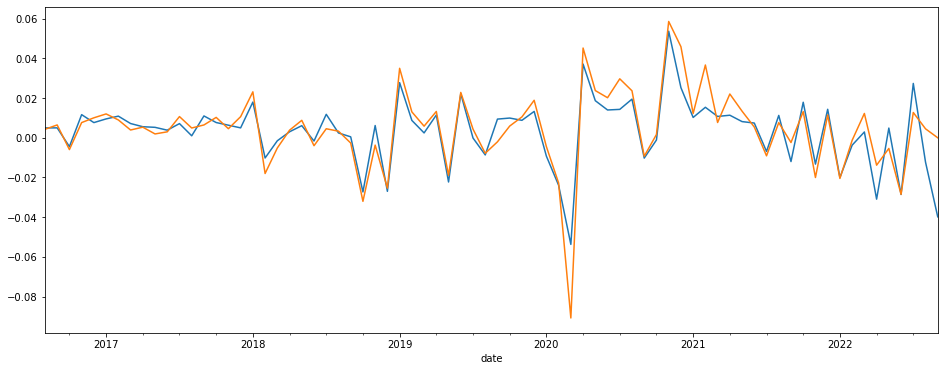

In [22]:
print('Correlation of Rolling Regression Fitted Returns with Actual Returns- ' + str(np.corrcoef(hf_data.iloc[rolling_reg.dropna().index.min():]['HFRIFWI Index'], rolling_reg_replication.T['HFRIFWI Index'])[0,1]))

plt.figure(figsize=(100, 6))
ax = rolling_reg_replication.T['HFRIFWI Index'].plot(figsize=(16, 6))
hf_data.iloc[rolling_reg.dropna().index.min():]['HFRIFWI Index'].plot(ax=ax)

The fitted returns from the rolling regression model are lower compared to the actual returns (only for the period where we are predicting the returns) by ~2%. However there is high correlation: ~89%, between the fitted and actual returns. The volatility for the fitted returns in the comparison period is also lower, thus giving us the same sharpe ratio.

A relatively lower negative skewness and lower excess Kurtosis for fitted returns also points out to a good fit by the rolling regression model

### 8.) We estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.
#### <center> $r^{hfri}_{t} = \alpha^{merr} + x_{t}^{merr}\beta^{merr} + \epsilon_{t}^{merr} $ </center>
#### <center> $\check{r}^{hfri}_{t} = \check{\alpha}^{merr} + x_{t}^{merr}\check{\beta}^{merr}  $ </center>

### Report

### 8.a) the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{merr}  $?

The Betas are quite different between the regression models with and without an intercept. Dropping the intercept makes the slope of the fit steeper just because we are forcing the line through the origin. The Beta's thus absorb the loss of the intercept and might have significantly different values.  

One of the most significant observance is with the USGG3M Index, which had a beta of -0.400591 with intercept. This shifted to a significant positive value of 0.334503	when the regression was ran without an intercept. In financial terms, we went from borrowing on the 3 month treasury yield to investing in it.

In [23]:
hedge_funds = hf_data.columns
factor = merrill
rf = merrill['USGG3M Index']

df3_lst= []
for fund in hedge_funds:
    fund_ret = hf_data[fund]
    reg = regression_based_performance(factor,fund_ret,rf,constant=False)
    beta = dict(reg[0])
    beta.update(RSquared = float(reg[2]))
    beta.update(TrackingError = float(reg[3]))
    df3_lst.append(pd.DataFrame([beta],index = [fund]))
    
    
no_constant_replication = pd.concat(df3_lst)
no_constant_replication.loc[['HFRIFWI Index']]

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity,RSquared,TrackingError
HFRIFWI Index,0.040448,1.551706,0.073052,0.10076,0.024909,0.144352,0.826081,0.025826


In [24]:
hedge_replication.loc[['HFRIFWI Index']]

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity,Intercept,RSquared,TrackingError
HFRIFWI Index,0.025589,0.834569,0.074135,0.105604,0.02324,0.147375,0.001142,0.821278,0.025751


### 8.b) the mean of the fitted value, $\check{r}^{hfri}_{t}$. How does it compare to the mean of the HFRI?

The Mean fitted returns for the Hedge Fund series is quite different from the actual mean returns. For the HFRI index, the fitted returns are 80 basis points lesser than the actual returns. This is a result of deviating betas which absorbed the loss of the intercept in the regression. 

In [25]:
merrill_summary = performance_summary(merrill)
df4_lst = []
for fund in hf_data.columns:
    fit_ret = np.array(no_constant_replication[no_constant_replication.index == fund][merrill.columns]) @ np.array(merrill.T)
    #fit_ret = dict(fit_ret)
    df4_lst.append(pd.DataFrame(fit_ret.T,columns = [fund], index = [merrill.index] ).T)

fit_returns = pd.concat(df4_lst)
mean_fit_returns = performance_summary(fit_returns.T).rename(columns = {'Mean':'Mean Fitted Returns'})
mean_fit_returns = mean_fit_returns.loc[:,['Mean Fitted Returns']].merge(summary_stats.loc[:,['Mean']], on = mean_fit_returns.index).rename(columns={'key_0' : 'Hedge Fund','Mean':'Mean Actual Returns'}).set_index('Hedge Fund')
mean_fit_returns.loc[['HFRIFWI Index']]

,Mean Fitted Returns,Mean Actual Returns
Hedge Fund,,
HFRIFWI Index,0.035031,0.042867


### 8.c) the correlations of the fitted values, $\check{r}^{hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{hfri}_{t}$

The Correlation between fitted returns and actual returns is quite high in both regression models. Although, there is a very slight improvement in the correlations when the regression is run with an intercept to replicate the alpha that is generated by either the skill or luck of the Hedge Fund Manager.

In [26]:
no_constant_replication = np.corrcoef(hf_data['HFRIFWI Index'], fit_returns.T['HFRIFWI Index'])[0,1]
constant_replication = np.corrcoef(hf_data['HFRIFWI Index'], hedge_replication_pred.T['HFRIFWI Index'])[0,1]
pd.DataFrame([[no_constant_replication,constant_replication]],columns=['Without Intercept','With Intercept'],index = ['Fitted & Actual Return Correlation'])


,Without Intercept,With Intercept
Fitted & Actual Return Correlation,0.905696,0.906244


### Do you think Merrill and ProShares fit their replicators with an intercept or not?

- Recall that if our porfolio is trying to deliver hedge-fund returns (including their mean and high SR) via an ETF, then the replication should definitely not include an intercept in the regression. It should make the replication factors match the mean, so that the investors in the ETF match the mean, not just the variation of HFRI. <br><br>

- However, if our porfolio is only trying to deliver a hedge, or a similar variation, then we should include an intercept, and accept that the replication will differ in mean returns by alpha but will match variation anyway. <br><br>

- Since the HDG's actual mean returns are lower than HFRI Index, we believe that Proshares and Merrill Lynch are running the regression without an intercept. This is also due to the fact that dropping the intercept forces the least square algorithm to use the factors to fit the means returns of the fund, thereby giving an optimized portfolio where the beta coefficients are interpreted as the factor weights in the clone for each respective fund

# 3.  Extensions
### This section is not graded, and you do not need to submit your answers. We may discuss some of these extensions.

## 1. Merrill constrains the weights of each asset in its replication regression of HFRI. 

### Try constraining your weights by re-doing 2.6.


### 1.a) Use Non-Negative Least Squares (NNLS) instead of OLS.

In [27]:
nnls_reg = LinearRegression(positive = True)

# Fit Intercept default value is True, no constant needed
nnls_model = nnls_reg.fit(merrill, hf_data[fund])
sum_index = list(merrill.columns)
sum_index.append('constant')
coefs = np.append(nnls_model.coef_,nnls_model.intercept_)

nnls_reg_summary = pd.DataFrame(coefs,index = sum_index,columns = ['Regression Parameters'])
nnls_reg_summary

,Regression Parameters
SPY US Equity,0.153227
USGG3M Index,0.125022
EEM US Equity,0.065031
EFA US Equity,0.053675
EUO US Equity,0.000000
IWM US Equity,0.027478
constant,-0.001093


### 1.b) Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

## 2. Let's decompose a few other targets to see if they behave as their name suggests.

### 2.a) Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

- Yes, the beta for EFA US Equity is 0.9647, which is very close to 1. <br><br>
- The beta for EUO US Equity is the second largest, which is 0.3224.  <br><br>
- Other betas are relatively small, with some negative betas. However, both these variables have large p-value and thus the betas are statistically insignificant.  <br><br>
- Therefore, we can replicate HEFA very well using only EUO US Equity and EFA.


In [28]:
y = other_data['HEFA US Equity'].dropna()
X = sm.add_constant(merrill.loc[y.index])
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HEFA US Equity   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     493.1
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           8.59e-70
Time:                        11:17:58   Log-Likelihood:                 373.96
No. Observations:                 103   AIC:                            -733.9
Df Residuals:                      96   BIC:                            -715.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0013      0.001      1.398      0.165      -0.001       0.003
SPY US Equity    -0.0042      0.040     -0.104      0.917      -0.085       0.076
USGG3M Index      0.0738      0.891      0.083      0.934      -1.695       1.843
EEM US Equity    -0.0580      0.025     -2.342      0.021      -0.107      -0.009
EFA US Equity     0.9647      0.041     23.436      0.000       0.883       1.046
EUO US Equity     0.3224      0.019     16.750      0.000       0.284       0.361
IWM US Equity     0.0163      0.024      0.669      0.505      -0.032       0.065
==============================================================================
Omnibus:                       16.032   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.853
Skew:                          -0.584   Prob(JB):                     1.21e-07
Kurtosis:                       5.461   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.b) Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds - in terms of our styles, what best describes venture capital?


- The venture capital fund is very sensitive to the market (SPY) and the US treasury-bills indicated by the corresponding betas. <br><br>
- This means that the venture capital performs well when the market and the economy are good. <br><br>
- However, the p-val for the US treasury-bills beta is very high (0.339), so the beta estimate can be unreliable.

In [29]:
y = other_data['TRVCI Index'].dropna()
X = sm.add_constant(merrill.loc[y.index])
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TRVCI Index   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     48.69
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           1.23e-30
Time:                        11:17:58   Log-Likelihood:                 233.04
No. Observations:                 134   AIC:                            -452.1
Df Residuals:                     127   BIC:                            -431.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0028      0.005     -0.558      0.578      -0.013       0.007
SPY US Equity     1.8552      0.242      7.665      0.000       1.376       2.334
USGG3M Index      5.2206      5.444      0.959      0.339      -5.552      15.993
EEM US Equity    -0.1309      0.140     -0.938      0.350      -0.407       0.145
EFA US Equity     0.0264      0.234      0.113      0.911      -0.438       0.490
EUO US Equity    -0.0804      0.110     -0.730      0.467      -0.298       0.138
IWM US Equity    -0.2178      0.152     -1.434      0.154      -0.518       0.083
==============================================================================
Omnibus:                        2.017   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                1.825
Skew:                          -0.286   Prob(JB):                        0.401
Kurtosis:                       2.994   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.c) TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

In [30]:
tail_perf = performance_summary(other_data[['TAIL US Equity']])
spy_perf = performance_summary(merrill[['SPY US Equity']])
pd.concat([tail_perf,spy_perf])

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recovery
TAIL US Equity,-0.053517,0.123874,-0.432031,1.145524,2.689943,-0.046539,-0.063032,-0.303636,2017-05-31,2022-08-31,NaT
SPY US Equity,0.121257,0.145613,0.832741,-0.413602,0.936671,-0.069215,-0.089169,-0.239271,2021-12-31,2022-09-30,NaT


In [31]:
fund_ret = other_data[['TAIL US Equity']].dropna()
factor = merrill.loc[fund_ret.index,['SPY US Equity']]
rf = merrill.loc[fund_ret.index,['USGG3M Index']]

reg = regression_based_performance(factor,fund_ret,rf)
beta = reg[0][0]
treynor_ratio = reg[1]
information_ratio = reg[2]
alpha = reg[3]
r_squared = reg[4]
reg_performance = pd.DataFrame([[beta,treynor_ratio,information_ratio,alpha,r_squared]],columns=['Market Beta','Treynor Ratio','Information Ratio','Alpha','R-Squared'],index = ['TAIL US Equity'])
reg_performance

,Market Beta,Treynor Ratio,Information Ratio,Alpha,R-Squared
TAIL US Equity,-0.564065,0.115081,0.095917,0.000609,0.622158


## 3. The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

### 3.a) Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

-  Even though the tracking error of Levered ETFs in a day is small, the error can become huge over time because of the effect of compounding. <br><br>
- During the volatile periods, the Levered ETFs need to be reset daily, so the compounding effect would exacerbate the tracking error.

### 3.b) Analyze SPXU and UPRO relative to SPY.
- ### SPXU is ProShares -3x SPX ETF.
- ### UPRO is ProShres +3x SPX ETF.

### i. Analyze them with the statistics from 2.1-2.3. Do these two ETFs seem to live up to their names?

- The mean returns of SPXU and UPRO seem to live up to their names, but in terms of Sharpe Ratio, they do not. <br><br>
- Also, the two ETFs have more tail risk in terms of VaR and CVaR. The market beta for SPXU is -2.61 instead of -3, but the market beta for UPRO is 3.10, which is very close to 3 as claimed.

In [32]:
gear_perf = performance_summary(other_data[['SPXU US Equity','UPRO US Equity']])
pd.concat([gear_perf,spy_perf])

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recovery
SPXU US Equity,-0.413952,0.400179,-1.034417,0.601159,1.150752,-0.188819,-0.258711,-0.998427,2011-09-30,2021-12-31,NaT
UPRO US Equity,0.311424,0.454161,0.685713,-0.482731,1.508532,-0.208867,-0.279603,-0.627347,2021-12-31,2022-09-30,NaT
SPY US Equity,0.121257,0.145613,0.832741,-0.413602,0.936671,-0.069215,-0.089169,-0.239271,2021-12-31,2022-09-30,NaT


In [33]:
factor = merrill['SPY US Equity']
rf = merrill['USGG3M Index']

df_lst= []
for fund in ['SPXU US Equity','UPRO US Equity']:
    fund_ret = other_data[fund]
    reg = regression_based_performance(factor,fund_ret,rf)
    beta = reg[0][0]
    treynor_ratio = reg[1]
    information_ratio = reg[2]
    alpha = reg[3]
    r_squared = reg[4]
    df_lst.append(pd.DataFrame([[beta,treynor_ratio,information_ratio,alpha,r_squared]],columns=['Market Beta','Treynor Ratio','Information Ratio','Alpha','R-Squared'],index = [fund]))

reg_performance = pd.concat(df_lst)
reg_performance

,Market Beta,Treynor Ratio,Information Ratio,Alpha,R-Squared
SPXU US Equity,-2.612019,0.160843,-0.781367,-0.008102,0.903319
UPRO US Equity,3.107795,0.098222,-1.703150,-0.005452,0.992847


### ii. Plot the cumulative returns of both these ETFs along with SPY. 


<AxesSubplot:xlabel='date'>

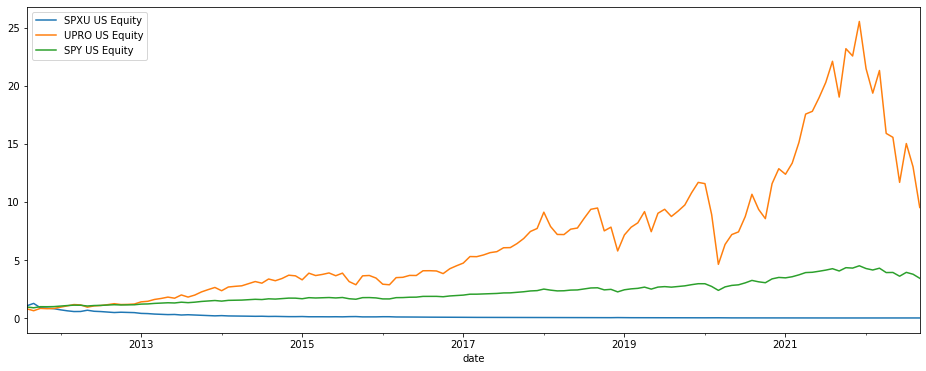

In [34]:
ax = (1+other_data[['SPXU US Equity','UPRO US Equity']]).cumprod().plot(figsize=(16, 6))
(1+merrill[['SPY US Equity']]).cumprod().plot(ax = ax)


### What do you conclude about levered ETFs?

- In conclusion, "levered" ETFs can be a good choice while the overall market is performing well as it can deliver much desirable returns. 
- However, when the market is volatile, the "levered" ETFs are very likely to underperform and it contains more tail risk as well.